In [228]:
import numpy as np
import matplotlib.pyplot as plt
import welly
import lasio
from math import exp
import pandas as pd
import matplotlib.lines as mlines

In [152]:
wellX1_path = r"X1 Logs Folder/WellX-1.las"
wellX1 = welly.Well.from_las(wellX1_path)

In [153]:
df_X1 = wellX1.df()

In [164]:
df_X1

,GR,DENS,SONI,CNL,MSFL,LL9S,LL9D,CALI,DI,RT,RX0,TVD,KAH,KAV,HEPOR,GD
Depth,,,,,,,,,,,,,,,,
3048.0000,134.994,2.441,93.997,24.040,3.683,2.211,1.988,9.017,19.17753,1.81299,3.05544,9922.0,NaN,NaN,NaN,NaN
3048.1524,131.686,2.435,93.407,24.115,3.714,2.252,2.138,9.030,12.00000,2.08313,3.08218,9922.5,NaN,NaN,NaN,NaN
3048.3048,130.035,2.454,94.064,23.430,3.776,2.372,2.217,9.014,15.54447,2.11912,3.13567,9923.0,NaN,NaN,NaN,NaN
3048.4572,131.690,2.475,94.983,23.028,3.987,2.504,2.299,8.999,17.46786,2.14726,3.31795,9923.5,NaN,NaN,NaN,NaN
3048.6096,131.692,2.479,95.378,22.792,4.278,2.567,2.177,9.008,28.53612,1.81183,3.56994,9924.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3946.5504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.00000,NaN,NaN,12870.0,NaN,NaN,NaN,NaN
3946.7028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.00000,NaN,NaN,12870.5,NaN,NaN,NaN,NaN
3946.8552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.00000,NaN,NaN,12871.0,NaN,NaN,NaN,NaN


In [50]:
DEPTH = np.array(df_X1.index)*3.28084
GR = np.array(df_X1['GR'])
TVD = np.array(df_X1['TVD'])
CALI = np.array(df_X1['CALI'])
LL9S = np.array(df_X1['LL9S'])
LL9D = np.array(df_X1['LL9D'])
MSFL = np.array(df_X1['MSFL'])
RT = np.array(df_X1['RT'])
RX0 = np.array(df_X1['RX0'])
CNL = np.array(df_X1['CNL'])
DENS = np.array(df_X1['DENS'])
SONI = np.array(df_X1['SONI'])
# GR = np.random.rand(450)*150
# CALI = np.random.rand(450)*16
# DEPTH  = np.arange(300, 750, 1)
# TVD = []
# j = 0.01
# for i in range(len(DEPTH)):
    
#     TVD.append(DEPTH[i] - 50*exp(j))
#     j = j + 0.002
# TVD = np.array(TVD)
conn = np.ones(len(DEPTH))

In [46]:
np.arange(-15, 46, 60)

array([-15,  45])

## <kbd>TESTING</kbd>

In [136]:
well = {
    'GR': GR,
    'CALI': CALI,
    'DEPTH': DEPTH,
    'TVD': TVD,
    'LL9S': LL9S,
    'LL9D': LL9D,
    'MSFL': MSFL,
    'RT': RT,
    'RX0': RX0,
    'CNL': CNL,
    'DENS': DENS,
    'SONI': SONI
    
}
tracks = [['GR', 'CALI'],['DEPTH', 'TVD']] #,['LL9D', 'LL9S'],['MSFL', 'RT', 'RX0'], ['DENS', 'CNL'],['SONI']]

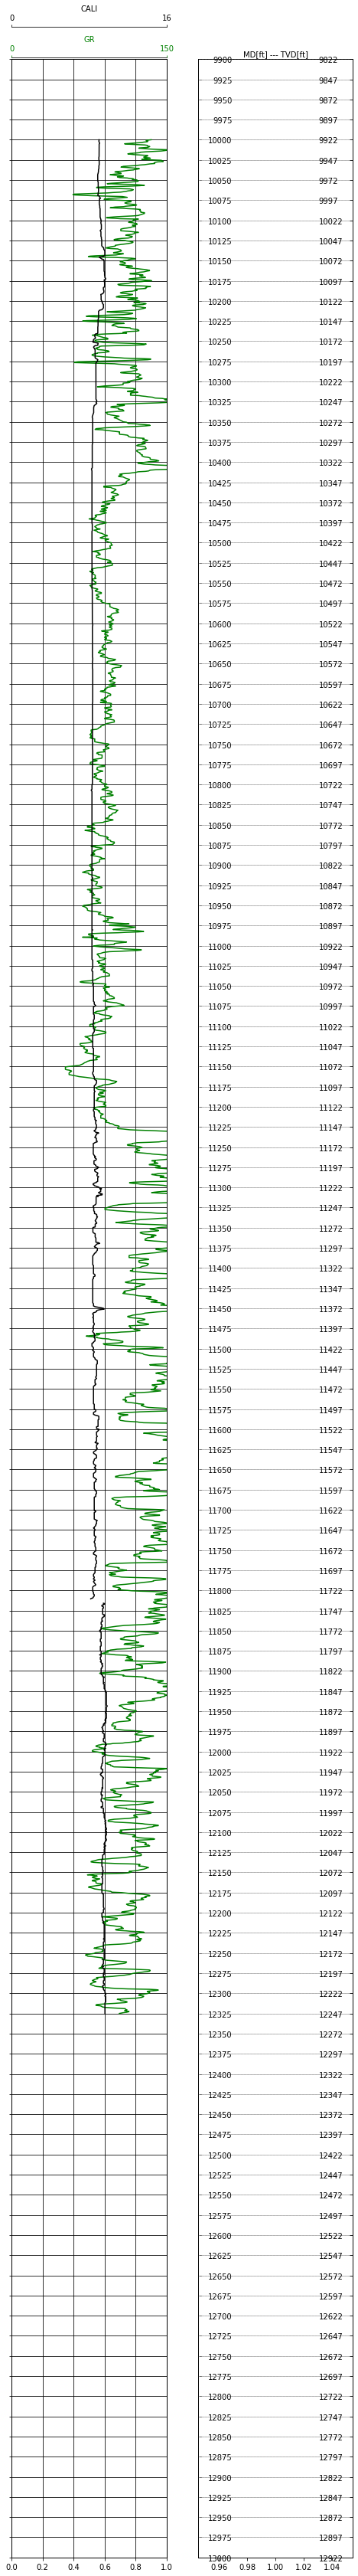

In [137]:
numtracks = len(tracks)

fig = plt.figure(figsize=(numtracks*4, 60))

field_top = 9900
field_bottom = 13000

topdiff = min(well['DEPTH']) - field_top

bottomdiff =field_bottom - max(well['DEPTH'])

mdbounds = [min(well['TVD']) - topdiff, max(well['TVD']) + bottomdiff]

def style_line(track_name):
    if track_name == 'GR':
        return ('g', '-')
    if track_name ==  'CALI':
        return ('k', '-')
    if track_name == 'LL9S':
        return ('b', '--')
    if track_name ==  'LL9D':
        return ('r', '-')
    if track_name ==  'MSFL':
        return ('k', '--')
    if track_name ==  'RT':
        return ('b', '-.')
    if track_name ==  'RX0':
        return ('r', '-')
    if track_name ==  'CNL':
        return ('m', '-')
    if track_name ==  'DENS':
        return ('b', '--')
    if track_name ==  'SONI':
        return ('k', '-')
    
def get_ticks(track_name, ymin = None, ymax = None):
    if track_name == 'GR':
        return np.arange(0, 151, 150)
    if track_name ==  'CALI':
        return np.arange(0,17, 16)
    if track_name == 'DEPTH':
        return np.arange(ymin, ymax+1, 25)
    if track_name == 'LL9S':
        return []
    if track_name == 'LL9D':
        return []
    if track_name == 'MSFL':
        return []
    if track_name == 'RT':
        return []
    if track_name == 'RX0':
        return []
    if track_name == 'CNL':
        n = np.arange(-15, 46, 60)
        return n[::-1]
    if track_name == 'DENS':
        return np.arange(1.95, 2.96, 1)
    if track_name == 'SONI':
        return np.arange(40, 201, 160)[::-1]
    
    

def get_xlim (track_name):
    if track_name == 'GR':
        return (0, 150)
    if track_name == 'CALI':
        return (0,16)
    if track_name == 'LL9S':
        return (0.2, 2000)
    if track_name == 'LL9D':
        return (0.2, 2000)
    if track_name == 'MSFL':
        return (0.2, 2000)
    if track_name == 'RT':
        return (0.2, 2000)
    if track_name == 'RX0':
        return (0.2, 2000)
    if track_name == 'CNL':
        return (45, -15)
    if track_name == 'DENS':
        return (1.95, 2.95)
    if track_name == 'SONI':
        return (200, 40)

    
def get_scale(track_name):
    if (track_name == 'GR') | (track_name == 'CALI') | (track_name == 'CNL') | (track_name == 'DENS') | (track_name == 'SONI'):
        return 'linear'
    if (track_name == 'LL9S') | (track_name == 'LL9D') | (track_name == 'MSFL') | (track_name == 'RT') | (track_name == 'RX0'):
        return 'log'
    
    
    
for i in range(1,numtracks + 1):
    host = fig.add_subplot(1, numtracks, i)

    
    # Building AX for log tracks
    if i != 2:
        
        # For multi track
        if isinstance(tracks[i-1], list):
            nested_track = tracks[i-1]
            d  = 0 
            for j in range(len(nested_track)):
                
                ax = host.twiny()
                plt.setp(obj = ax, ylim = (field_top, field_bottom)[::-1], 
                                   xlim = get_xlim(nested_track[j]),
                                   xscale = get_scale(nested_track[j]))
                
                c, ls = style_line(nested_track[j])
    
                ax.xaxis.set_ticks_position('top')
                ax.tick_params(axis='x', colors=c)
                ax.spines['top'].set_position(('outward', 2+d))
                d+=40
                
                if len(get_ticks(nested_track[j])) == 0:
                    ax.plot(well[nested_track[j]], well['DEPTH'], c, ls = ls)
                    ax.set_xlabel(nested_track[j], color = c)    
                    host.set_yticks(get_ticks('DEPTH', field_top, field_bottom))
                    host.set_yticklabels([])
                    ax.grid(True, which = 'both', c = 'k', lw = 0.5, axis = 'both')
                    
                else:
                    ax.set_xticks(get_ticks(nested_track[j]), minor = False)    
                    ax.plot(well[nested_track[j]], well['DEPTH'], c, ls = ls)
                    ax.set_xlabel(nested_track[j], color = c)
                    host.set_yticks(get_ticks('DEPTH', field_top, field_bottom))
                    host.set_yticklabels([])
                    
                if j == 0:
                    host.grid(True, which = 'major', axis = 'both', color = 'k')

            
    # for DEPTH TVD track
    else:
        
        
        host.plot(conn, well['DEPTH'], alpha = 0)
        plt.setp(obj = host, ylim = (field_top, field_bottom)[::-1])
        host.set_xlabel('MD[ft] --- TVD[ft]')
        host.xaxis.set_label_position('top')
        host.set_yticks(get_ticks('DEPTH', field_top, field_bottom))
        
        host.tick_params(axis ='y', which = 'major', length = 4, pad = -45, direction = 'in')
        
        host.grid(True, which = 'both', axis = 'y')
        
        
        host = host.twinx()
        host.plot(conn, well['TVD'], alpha = 0)
        host.set_ylim(mdbounds[0], mdbounds[1])
        host.set_yticks(get_ticks('DEPTH', mdbounds[0], mdbounds[1]))
        host.tick_params(axis ='y', which = 'major', length = 4, pad = -45, direction = 'in')
        host.grid(True, which = 'both', axis = 'y', ls = '--')
        
        host.invert_yaxis()
        
        
        
    
        
        
    

## <kbd>PLOTTING</kbd> 

In [250]:
class stdlog:
    """Python standardized logs class"""
    def __init__(self, fpath):
        """Create a well object - 
                
                params:
                    - Path to .las file directory
        """
        
        self.fpath = fpath
        self.wellobject = None
    
    def get_data(self, mnemonics):
        """Uploads log data from .las data"""
            
        """ params: mnemonics(dict) - Dictionory Containing the custom mnemonics being used in the las.
                                      stdlog package works with preset mnemonics names that helps in scaling and standardizing,
                                      as of current version 1.0 we for now use most popular ones:
                                            {    pre-set  custom
                                                 ===================
                                                'GR':   gamma ray, 
                                                'CALI': caliper ,
                                                'DEPTH': Measured Depth,
                                                'TVD':   True Vertical Depth,
                                                'LL9S':  Short resistivity Lateralog,
                                                'LL9D':  Long resistivity lateralog,
                                                'MSFL':  Micro Spherical,
                                                'RT':    True Resistivity,
                                                'RX0':   Flushed Zone Resistivity,
                                                'CNL':   Neutron,
                                                'DENS':  Density,
                                                'SONI':  Sonic 

                                            }
        """
        
        
        _well = {}
        input_mnemonics = list(mnemonics.keys())
        data = welly.Well.from_las(self.fpath)
        expanded_data = data.df()
        expanded_data[expanded_data.index.name.upper()] = expanded_data.index
        
        self.wellobject = data
        
        for mnem in input_mnemonics:
            if mnem == 'DEPTH':
                log_data = 3.28084 * np.array(expanded_data[mnemonics[mnem]])
                _well[mnem] = log_data
            else:
                log_data = np.array(expanded_data[mnemonics[mnem]])
                _well[mnem] = log_data
                
        return _well
    
    def style_line(track_name):
        if track_name == 'GR':
            return ('g', '-')
        if track_name ==  'CALI':
            return ('k', '-')
        if track_name == 'LL9S':
            return ('b', '--')
        if track_name ==  'LL9D':
            return ('r', '-')
        if track_name ==  'MSFL':
            return ('k', '--')
        if track_name ==  'RT':
            return ('b', '-.')
        if track_name ==  'RX0':
            return ('r', '-')
        if track_name ==  'CNL':
            return ('m', '-')
        if track_name ==  'DENS':
            return ('b', '--')
        if track_name ==  'SONI':
            return ('k', '-')
    
    def get_ticks(track_name, ymin = None, ymax = None):
        if track_name == 'GR':
            return np.arange(0, 151, 150)
        if track_name ==  'CALI':
            return np.arange(0,17, 16)
        if track_name == 'DEPTH':
            return np.arange(ymin, ymax+1, 25)
        if track_name == 'LL9S':
            return []
        if track_name == 'LL9D':
            return []
        if track_name == 'MSFL':
            return []
        if track_name == 'RT':
            return []
        if track_name == 'RX0':
            return []
        if track_name == 'CNL':
            n = np.arange(-15, 46, 60)
            return n[::-1]
        if track_name == 'DENS':
            return np.arange(1.95, 2.96, 1)
        if track_name == 'SONI':
            return np.arange(40, 201, 160)[::-1]


    
    def get_xlim (track_name):
        if track_name == 'GR':
            return (0, 150)
        if track_name == 'CALI':
            return (0,16)
        if track_name == 'LL9S':
            return (0.2, 2000)
        if track_name == 'LL9D':
            return (0.2, 2000)
        if track_name == 'MSFL':
            return (0.2, 2000)
        if track_name == 'RT':
            return (0.2, 2000)
        if track_name == 'RX0':
            return (0.2, 2000)
        if track_name == 'CNL':
            return (45, -15)
        if track_name == 'DENS':
            return (1.95, 2.95)
        if track_name == 'SONI':
            return (200, 40)


    def get_scale(track_name):
        if (track_name == 'GR') | (track_name == 'CALI') | (track_name == 'CNL') | (track_name == 'DENS') | (track_name == 'SONI'):
            return 'linear'
        if (track_name == 'LL9S') | (track_name == 'LL9D') | (track_name == 'MSFL') | (track_name == 'RT') | (track_name == 'RX0'):
            return 'log'
     
    
    
    
    
    
    def visualize (self, mnemonics,  pltrange, tracks = None, sbsline = None ):
        """Visualizes the given log data in standard form"""
        
        """
             params: mnemonics(dict) - Dictionory Containing the custom mnemonics being used in the las.
                                      stdlog package works with preset mnemonics names that helps in scaling and standardizing,
                                      as of current version 1.0 we for now use most popular ones:
                                            {    pre-set  custom
                                                 ===================
                                                'GR':   gamma ray, 
                                                'CALI': caliper ,
                                                'DEPTH': Measured Depth,
                                                'TVD':   True Vertical Depth,
                                                'LL9S':  Short resistivity Lateralog,
                                                'LL9D':  Long resistivity lateralog,
                                                'MSFL':  Micro Spherical,
                                                'RT':    True Resistivity,
                                                'RX0':   Flushed Zone Resistivity,
                                                'CNL':   Neutron,
                                                'DENS':  Density,
                                                'SONI':  Sonic 

                                            }
                    tracks(list)  - nested list of tracks !! DEPTH and TVD should always be given in the second place
                                    Example:
                                       [['GR', 'CALI'], ['DEPTH', 'TVD'], ['CNL']]
                                       
                                       
                    pltrange(tuple) - A tuple for indicating plot min and max ranges - This is useful when comparing multiple wells that 
                                      all plots are in the same range 
                                      
                    
                    sbsline(tuple)  -  (position, state) Shalebaseline specific to Gamma Ray tracks
        """
                
        
        
        
        if not isinstance(tracks, list) and not isinstance(pltrange, tuple):
            print("Tracks should be given as nested lists representing individual tracks and pltrange as tuple")
            print("Terminated .....")
        
        else:
            well = self.get_data(mnemonics)
            
            
            field_top, field_bottom = pltrange
            numtracks = len(tracks)
            topdiff = min(well['DEPTH']) - field_top
            bottomdiff =field_bottom - max(well['DEPTH'])
            mdbounds = [min(well['TVD']) - topdiff, max(well['TVD']) + bottomdiff]
            
            fig = plt.figure(figsize=(numtracks*4, 60))
            
            for i in range(1,numtracks + 1):
                host = fig.add_subplot(1, numtracks, i)


                # Building AX for log tracks
                if i != 2:

                    # For multi track
                    if isinstance(tracks[i-1], list):
                        nested_track = tracks[i-1]
                        
                      
                        
                        
                        d  = 0 
                        for j in range(len(nested_track)):
                            if nested_track[j] == 'GR':
                                grpos = i
                        
                            ax = host.twiny()
                            plt.setp(obj = ax, ylim = (field_top, field_bottom)[::-1], 
                                               xlim = get_xlim(nested_track[j]),
                                               xscale = get_scale(nested_track[j]))

                            c, ls = style_line(nested_track[j])

                            ax.xaxis.set_ticks_position('top')
                            ax.tick_params(axis='x', colors=c)
                            ax.spines['top'].set_position(('outward', 2+d))
                            d+=40

                            if len(get_ticks(nested_track[j])) == 0:
                                ax.plot(well[nested_track[j]], well['DEPTH'], c, ls = ls)
                                ax.set_xlabel(nested_track[j], color = c)    
                                host.set_yticks(get_ticks('DEPTH', field_top, field_bottom))
                                host.set_yticklabels([])
                                ax.grid(True, which = 'both', c = 'k', lw = 0.5, axis = 'both')

                            else:
                                ax.set_xticks(get_ticks(nested_track[j]), minor = False)    
                                ax.plot(well[nested_track[j]], well['DEPTH'], c, ls = ls)
                                ax.set_xlabel(nested_track[j], color = c)
                                host.set_yticks(get_ticks('DEPTH', field_top, field_bottom))
                                host.set_yticklabels([])

                            if j == 0:
                                host.grid(True, which = 'major', axis = 'both', color = 'k')


                # for DEPTH TVD track
                else:


                    host.plot(conn, well['DEPTH'], alpha = 0)
                    plt.setp(obj = host, ylim = (field_top, field_bottom)[::-1])
                    host.set_xlabel('MD[ft] --- TVD[ft]')
                    host.xaxis.set_label_position('top')
                    host.set_yticks(get_ticks('DEPTH', field_top, field_bottom))

                    host.tick_params(axis ='y', which = 'major', length = 4, pad = -45, direction = 'in')

                    host.grid(True, which = 'both', axis = 'y')


                    host = host.twinx()
                    host.plot(conn, well['TVD'], alpha = 0)
                    host.set_ylim(mdbounds[0], mdbounds[1])
                    host.set_yticks(get_ticks('DEPTH', mdbounds[0], mdbounds[1]))
                    host.tick_params(axis ='y', which = 'major', length = 4, pad = -45, direction = 'in')
                    host.grid(True, which = 'both', axis = 'y', ls = '--')

                    host.invert_yaxis()
                    
                if sbsline is not None:
                    val, state = sbsline
                    
                    xval = np.repeat(val, 10)
                    yval = np.linspace(field_top, field_bottom, 10)
                    print("1{}{}".format(numtracks, grpos))
                    ax = fig.axes[grpos]
                    line = mlines.Line2D([100,100], [9000, 13000], color='red')
                    ax.add_line(line)
                    
                    
        return fig


In [252]:
x1 = stdlog(r"X1 Logs Folder/WellX-1.las")

In [253]:
d = {
    'GR': 'GR',
    'CALI': 'CALI',
    'DEPTH': 'DEPTH',
    'TVD': 'TVD',
    'LL9S': 'LL9S',
    'LL9D': 'LL9D',
    'MSFL': 'MSFL',
    'RT': 'RT',
    'RX0': 'RX0',
    'CNL': 'CNL',
    'DENS': 'DENS',
    'SONI': 'SONI'
}

GR
CALI
DEPTH
TVD
LL9S
LL9D
MSFL
RT
RX0
CNL
DENS
SONI
121
121


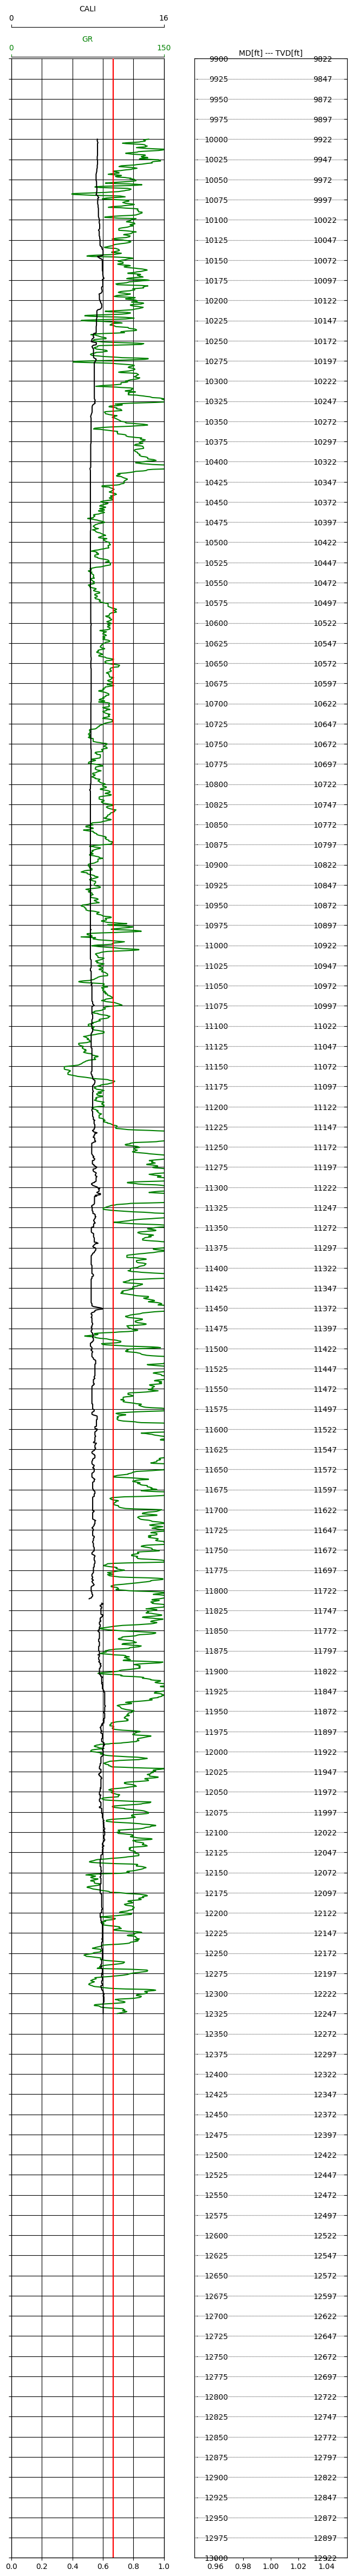

In [254]:
x1.visualize(d, pltrange=(9900, 13000), 
             tracks = [['GR', 'CALI'], ['DEPTH','TVD']],#,['LL9D', 'LL9S'],['MSFL', 'RT', 'RX0'], ['DENS', 'CNL'],['SONI']],
            sbsline=(125,'none'))